# 10分钟入门pandas
教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)

## 目录
* [创建对象](#创建对象)
* [数据视图](#数据视图)
* [数据选取](#数据选取)
* [数据缺失的处理](#数据缺失的处理)
* [函数操作](#函数操作)
* [数据合并](#数据合并)
* [分组](#分组)
* [数据变形](#数据变形)
* [时间序列](#时间序列)
* [数据标签](#数据标签)
* [绘图](#绘图)
* [导入导出数据](#导入导出数据)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 创建对象

[返回目录](#目录)

传入数据列表创建Series对象

In [142]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])


In [143]:
s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

创建DataFrame对象

通过时间索引，自定义标签列名，和numpy的array数据来创建DataFrame对象

In [144]:
dates = pd.date_range('20130101', periods=6)


In [145]:
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [146]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))


In [147]:
df


,A,B,C,D
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-03,0.789491,-1.197667,-1.374647,0.106515
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-05,-1.471889,1.727521,-0.067537,0.369701
2013-01-06,0.597800,-0.911633,0.473245,0.195290


通过字典创建DataFrame对象

In [148]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(3, index=list(range(4)), dtype='float'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo',
                    'G': 2})


In [149]:
df2


,A,B,C,D,E,F,G
0,1.0,2013-01-02,3.0,3,test,foo,2
1,1.0,2013-01-02,3.0,3,train,foo,2
2,1.0,2013-01-02,3.0,3,test,foo,2
3,1.0,2013-01-02,3.0,3,train,foo,2


In [150]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
G             int64
dtype: object

In [151]:
dir(df2)


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '_

## 数据视图

[返回目录](#目录)

观察数据的头部和尾部

In [152]:
df.head()


,A,B,C,D
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-03,0.789491,-1.197667,-1.374647,0.106515
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-05,-1.471889,1.727521,-0.067537,0.369701


In [153]:
df.tail(3)


,A,B,C,D
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-05,-1.471889,1.727521,-0.067537,0.369701
2013-01-06,0.597800,-0.911633,0.473245,0.195290


查看DataFrame对象的索引，列名，数据信息

In [154]:
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [155]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [156]:
df.values


array([[-2.05639039,  0.24419177, -1.09965794, -0.48358755],
       [-0.4645402 ,  1.02488682, -0.3065445 ,  0.47295162],
       [ 0.78949123, -1.19766686, -1.37464651,  0.10651462],
       [ 1.20941099,  0.93466889,  0.40849101,  1.69519949],
       [-1.4718889 ,  1.72752135, -0.06753667,  0.36970096],
       [ 0.59780034, -0.9116327 ,  0.47324549,  0.19528961]])

简单统计

In [157]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.232686,0.303662,-0.327775,0.392678
std,1.321323,1.155870,0.767286,0.720032
min,-2.056390,-1.197667,-1.374647,-0.483588
25%,-1.220052,-0.622677,-0.901380,0.128708
50%,0.066630,0.589430,-0.187041,0.282495
75%,0.741569,1.002332,0.289484,0.447139
max,1.209411,1.727521,0.473245,1.695199


转置数据

In [158]:
df.T


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-2.056390,-0.464540,0.789491,1.209411,-1.471889,0.597800
B,0.244192,1.024887,-1.197667,0.934669,1.727521,-0.911633
C,-1.099658,-0.306545,-1.374647,0.408491,-0.067537,0.473245
D,-0.483588,0.472952,0.106515,1.695199,0.369701,0.195290


根据列名排序

In [159]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,-0.483588,-1.099658,0.244192,-2.056390
2013-01-02,0.472952,-0.306545,1.024887,-0.464540
2013-01-03,0.106515,-1.374647,-1.197667,0.789491
2013-01-04,1.695199,0.408491,0.934669,1.209411
2013-01-05,0.369701,-0.067537,1.727521,-1.471889
2013-01-06,0.195290,0.473245,-0.911633,0.597800


根据B列数值排序

In [160]:
df.sort_values(by='B')


,A,B,C,D
2013-01-03,0.789491,-1.197667,-1.374647,0.106515
2013-01-06,0.597800,-0.911633,0.473245,0.195290
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-05,-1.471889,1.727521,-0.067537,0.369701


## 数据选取

[返回目录](#目录)

### 选取

选取单列数据

In [161]:
df['A']


2013-01-01   -2.056390
2013-01-02   -0.464540
2013-01-03    0.789491
2013-01-04    1.209411
2013-01-05   -1.471889
2013-01-06    0.597800
Freq: D, Name: A, dtype: float64

按行选取数据

In [162]:
df[0:3]


,A,B,C,D
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-03,0.789491,-1.197667,-1.374647,0.106515


In [163]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-03,0.789491,-1.197667,-1.374647,0.106515
2013-01-04,1.209411,0.934669,0.408491,1.695199


### 通过标签选取数据

In [164]:
df.loc[dates[0]]


A   -2.056390
B    0.244192
C   -1.099658
D   -0.483588
Name: 2013-01-01 00:00:00, dtype: float64

In [165]:
df.loc[:, ['A', 'B']]


,A,B
2013-01-01,-2.056390,0.244192
2013-01-02,-0.464540,1.024887
2013-01-03,0.789491,-1.197667
2013-01-04,1.209411,0.934669
2013-01-05,-1.471889,1.727521
2013-01-06,0.597800,-0.911633


In [166]:
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,-0.464540,1.024887
2013-01-03,0.789491,-1.197667
2013-01-04,1.209411,0.934669


In [167]:
df.loc['20130102', ['A', 'B']]


A   -0.464540
B    1.024887
Name: 2013-01-02 00:00:00, dtype: float64

In [168]:
df.loc[dates[0], 'A']


-2.056390391730318

In [169]:
df.at[dates[0], 'A']


-2.056390391730318

### 通过位置选取数据

In [170]:
df.iloc[3]


A    1.209411
B    0.934669
C    0.408491
D    1.695199
Name: 2013-01-04 00:00:00, dtype: float64

In [171]:
df.iloc[3:5, 0:2]


,A,B
2013-01-04,1.209411,0.934669
2013-01-05,-1.471889,1.727521


In [172]:
df.iloc[[1, 2, 4], [0, 2]]


,A,C
2013-01-02,-0.464540,-0.306545
2013-01-03,0.789491,-1.374647
2013-01-05,-1.471889,-0.067537


In [173]:
df.iloc[1:3]


,A,B,C,D
2013-01-02,-0.464540,1.024887,-0.306545,0.472952
2013-01-03,0.789491,-1.197667,-1.374647,0.106515


In [174]:
df.iloc[:, 1:3]


,B,C
2013-01-01,0.244192,-1.099658
2013-01-02,1.024887,-0.306545
2013-01-03,-1.197667,-1.374647
2013-01-04,0.934669,0.408491
2013-01-05,1.727521,-0.067537
2013-01-06,-0.911633,0.473245


In [175]:
df.iloc[1, 1]


1.0248868167994758

In [176]:
df.iat[1, 1]


1.0248868167994758

### 布尔索引 

In [177]:
df[df.A > 0]


,A,B,C,D
2013-01-03,0.789491,-1.197667,-1.374647,0.106515
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-06,0.597800,-0.911633,0.473245,0.195290


In [178]:
df[df > 0]


,A,B,C,D
2013-01-01,NaN,0.244192,NaN,NaN
2013-01-02,NaN,1.024887,NaN,0.472952
2013-01-03,0.789491,NaN,NaN,0.106515
2013-01-04,1.209411,0.934669,0.408491,1.695199
2013-01-05,NaN,1.727521,NaN,0.369701
2013-01-06,0.597800,NaN,0.473245,0.195290


In [179]:
df2 = df.copy()


In [180]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']


In [181]:
df2


,A,B,C,D,E
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588,one
2013-01-02,-0.464540,1.024887,-0.306545,0.472952,one
2013-01-03,0.789491,-1.197667,-1.374647,0.106515,two
2013-01-04,1.209411,0.934669,0.408491,1.695199,three
2013-01-05,-1.471889,1.727521,-0.067537,0.369701,four
2013-01-06,0.597800,-0.911633,0.473245,0.195290,three


In [182]:
df2[df2['E'].isin(['one', 'four'])]


,A,B,C,D,E
2013-01-01,-2.056390,0.244192,-1.099658,-0.483588,one
2013-01-02,-0.464540,1.024887,-0.306545,0.472952,one
2013-01-05,-1.471889,1.727521,-0.067537,0.369701,four


### 修改数据

In [183]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))


In [184]:
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [185]:
df['F'] = s1


In [186]:
df.at[dates[0], 'A'] = 0


In [187]:
df.iat[0, 1] = 0


In [188]:
df.loc[:, 'D'] = np.array([5] * len(df))


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_3342/438096961.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [189]:
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.099658,5,NaN
2013-01-02,-0.464540,1.024887,-0.306545,5,1.0
2013-01-03,0.789491,-1.197667,-1.374647,5,2.0
2013-01-04,1.209411,0.934669,0.408491,5,3.0
2013-01-05,-1.471889,1.727521,-0.067537,5,4.0
2013-01-06,0.597800,-0.911633,0.473245,5,5.0


In [190]:
df2 = df.copy()


In [191]:
df2[df2 > 0] = -df2


In [192]:
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.099658,-5,NaN
2013-01-02,-0.464540,-1.024887,-0.306545,-5,-1.0
2013-01-03,-0.789491,-1.197667,-1.374647,-5,-2.0
2013-01-04,-1.209411,-0.934669,-0.408491,-5,-3.0
2013-01-05,-1.471889,-1.727521,-0.067537,-5,-4.0
2013-01-06,-0.597800,-0.911633,-0.473245,-5,-5.0


## 数据缺失的处理

[返回目录](#目录)

In [193]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])


In [194]:
df1.loc[dates[0]:dates[1], 'E'] = 1


In [195]:
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.099658,5,NaN,1.0
2013-01-02,-0.464540,1.024887,-0.306545,5,1.0,1.0
2013-01-03,0.789491,-1.197667,-1.374647,5,2.0,NaN
2013-01-04,1.209411,0.934669,0.408491,5,3.0,NaN


舍弃含有NaN的行

In [196]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,-0.46454,1.024887,-0.306545,5,1.0,1.0


填充缺失数据

In [197]:
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.099658,5,5.0,1.0
2013-01-02,-0.464540,1.024887,-0.306545,5,1.0,1.0
2013-01-03,0.789491,-1.197667,-1.374647,5,2.0,5.0
2013-01-04,1.209411,0.934669,0.408491,5,3.0,5.0


In [198]:
pd.isnull(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 函数操作

[返回目录](#目录)

### 统计

纵向求均值

In [199]:
df.mean()


A    0.110046
B    0.262963
C   -0.327775
D    5.000000
F    3.000000
dtype: float64

横向求均值

In [200]:
df.mean(1)


2013-01-01    0.975086
2013-01-02    1.250760
2013-01-03    1.043436
2013-01-04    2.110514
2013-01-05    1.837619
2013-01-06    2.031883
Freq: D, dtype: float64

In [201]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)


In [202]:
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [203]:
df.sub(s, axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.210509,-2.197667,-2.374647,4.0,1.0
2013-01-04,-1.790589,-2.065331,-2.591509,2.0,0.0
2013-01-05,-6.471889,-3.272479,-5.067537,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

In [204]:
new_var = np.cumsum
df.apply(new_var)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.099658,5,NaN
2013-01-02,-0.464540,1.024887,-1.406202,10,1.0
2013-01-03,0.324951,-0.172780,-2.780849,15,3.0
2013-01-04,1.534362,0.761889,-2.372358,20,6.0
2013-01-05,0.062473,2.489410,-2.439895,25,10.0
2013-01-06,0.660273,1.577778,-1.966649,30,15.0


In [205]:
df.apply(lambda x: x.max() - x.min())


A    2.681300
B    2.925188
C    1.847892
D    0.000000
F    4.000000
dtype: float64

### 直方统计

In [206]:
s = pd.Series(np.random.randint(0, 7, size=10))


In [207]:
s


0    2
1    5
2    6
3    0
4    5
5    0
6    5
7    3
8    6
9    2
dtype: int64

In [208]:
s.value_counts()


5    3
2    2
6    2
0    2
3    1
dtype: int64

### 字符串方法

In [209]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [210]:
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

[返回目录](#目录)

### Concat函数

In [211]:
df = pd.DataFrame(np.random.randn(10, 4))


In [212]:
df


,0,1,2,3
0,0.252527,2.571233,1.317795,1.545966
1,0.812043,0.567218,0.213245,-0.044844
2,-1.351111,0.195284,0.663943,0.849605
3,0.628778,0.065433,2.420232,-0.966905
4,1.730796,-0.367437,0.345831,-0.399495
5,2.319604,-0.324516,0.014784,-0.813217
6,-1.293817,-0.033683,0.520174,1.449554
7,0.778742,-1.149625,0.343866,1.502256
8,-1.906462,1.304797,-2.000068,-1.605952
9,-0.479049,-0.432264,1.119791,1.043854


In [213]:
pieces = [df[:3], df[3:6], df[7:]]


In [214]:
pd.concat(pieces)


,0,1,2,3
0,0.252527,2.571233,1.317795,1.545966
1,0.812043,0.567218,0.213245,-0.044844
2,-1.351111,0.195284,0.663943,0.849605
3,0.628778,0.065433,2.420232,-0.966905
4,1.730796,-0.367437,0.345831,-0.399495
5,2.319604,-0.324516,0.014784,-0.813217
7,0.778742,-1.149625,0.343866,1.502256
8,-1.906462,1.304797,-2.000068,-1.605952
9,-0.479049,-0.432264,1.119791,1.043854


### Join函数

In [215]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})


In [216]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})


In [217]:
left


,key,lval
0,foo,1
1,foo,2


In [218]:
right


,key,rval
0,foo,4
1,foo,5


In [219]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append函数

In [220]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])


In [221]:
df


,A,B,C,D
0,0.634364,-0.553388,-0.043976,0.231333
1,0.701888,2.052739,-0.751463,1.107722
2,-1.248011,-0.905034,0.804603,1.043462
3,-1.000185,1.191171,-0.580114,-1.097058
4,-1.144170,-0.433842,-2.378248,-0.634191
5,-0.256324,0.455315,-0.314047,0.481696
6,-1.913739,-0.122717,-0.348778,-1.776178
7,-0.736583,-1.247635,0.389521,0.437524


In [222]:
s = df.iloc[3]


In [223]:
df.append(s, ignore_index=True)


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_3342/1496751184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,0.634364,-0.553388,-0.043976,0.231333
1,0.701888,2.052739,-0.751463,1.107722
2,-1.248011,-0.905034,0.804603,1.043462
3,-1.000185,1.191171,-0.580114,-1.097058
4,-1.144170,-0.433842,-2.378248,-0.634191
5,-0.256324,0.455315,-0.314047,0.481696
6,-1.913739,-0.122717,-0.348778,-1.776178
7,-0.736583,-1.247635,0.389521,0.437524
8,-1.000185,1.191171,-0.580114,-1.097058


## 分组

[返回目录](#目录)

In [224]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})


In [225]:
df


,A,B,C,D
0,foo,one,-0.682340,1.038159
1,bar,one,1.107226,0.142783
2,foo,two,0.110424,2.074268
3,bar,three,0.390273,-0.635263
4,foo,two,-1.132704,1.096669
5,bar,two,0.383075,-2.729156
6,foo,one,-0.529009,-0.170960
7,foo,three,2.809686,-0.849661


In [226]:
df.groupby('A').sum()


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_3342/3225325629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,1.880573,-3.221636
foo,0.576057,3.188476


In [227]:
df.groupby(['A', 'B']).sum()


C         D
A   B                        
bar one    1.107226  0.142783
    three  0.390273 -0.635263
    two    0.383075 -2.729156
foo one   -1.211349  0.867200
    three  2.809686 -0.849661
    two   -1.022280  3.170938

## 数据变形

[返回目录](#目录)

### Stack函数

In [228]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))


In [229]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])


In [230]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [231]:
df2 = df[:4]


In [232]:
df2


A         B
first second                    
bar   one     0.179856  0.133368
      two    -0.464166  2.109709
baz   one     0.988844  1.639607
      two     0.392699 -0.466688

In [233]:
stacked = df2.stack()


In [234]:
stacked


first  second   
bar    one     A    0.179856
               B    0.133368
       two     A   -0.464166
               B    2.109709
baz    one     A    0.988844
               B    1.639607
       two     A    0.392699
               B   -0.466688
dtype: float64

In [235]:
stacked.unstack()


A         B
first second                    
bar   one     0.179856  0.133368
      two    -0.464166  2.109709
baz   one     0.988844  1.639607
      two     0.392699 -0.466688

In [236]:
stacked.unstack(1)


second        one       two
first                      
bar   A  0.179856 -0.464166
      B  0.133368  2.109709
baz   A  0.988844  0.392699
      B  1.639607 -0.466688

In [237]:
stacked.unstack(0)


first          bar       baz
second                      
one    A  0.179856  0.988844
       B  0.133368  1.639607
two    A -0.464166  0.392699
       B  2.109709 -0.466688

### 数据透视表

In [238]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})


In [239]:
df


,A,B,C,D,E
0,one,A,foo,-0.467886,-1.019505
1,one,B,foo,-0.804946,-0.104828
2,two,C,foo,-0.160032,0.482402
3,three,A,bar,-0.604974,1.642010
4,one,B,bar,0.472309,2.035627
5,one,C,bar,1.546756,-1.147486
6,two,A,foo,-1.319322,-0.642892
7,three,B,foo,0.838411,-0.129338
8,one,C,foo,-1.704083,0.456500
9,one,A,bar,0.107173,-0.479151


In [240]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')


C             bar       foo
A     B                    
one   A  0.107173 -0.467886
      B  0.472309 -0.804946
      C  1.546756 -1.704083
three A -0.604974       NaN
      B       NaN  0.838411
      C  0.528101       NaN
two   A       NaN -1.319322
      B -1.165576       NaN
      C       NaN -0.160032

## 时间序列

[返回目录](#目录)

In [241]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')


In [242]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)


In [243]:
ts.resample('5Min').sum()


2012-01-01    23286
Freq: 5T, dtype: int64

In [244]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')


In [245]:
ts = pd.Series(np.random.randn(len(rng)), rng)


In [246]:
ts


2012-03-06   -1.111873
2012-03-07   -0.340743
2012-03-08    1.213293
2012-03-09   -0.033936
2012-03-10   -0.008810
Freq: D, dtype: float64

In [247]:
ts_utc = ts.tz_localize('UTC')


In [248]:
ts_utc


2012-03-06 00:00:00+00:00   -1.111873
2012-03-07 00:00:00+00:00   -0.340743
2012-03-08 00:00:00+00:00    1.213293
2012-03-09 00:00:00+00:00   -0.033936
2012-03-10 00:00:00+00:00   -0.008810
Freq: D, dtype: float64

In [249]:
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00   -1.111873
2012-03-06 19:00:00-05:00   -0.340743
2012-03-07 19:00:00-05:00    1.213293
2012-03-08 19:00:00-05:00   -0.033936
2012-03-09 19:00:00-05:00   -0.008810
Freq: D, dtype: float64

In [250]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')


In [251]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [252]:
ts


2012-01-31   -0.291683
2012-02-29    0.311938
2012-03-31    1.220115
2012-04-30   -0.106464
2012-05-31    0.412581
Freq: M, dtype: float64

In [253]:
ps = ts.to_period()


In [254]:
ps


2012-01   -0.291683
2012-02    0.311938
2012-03    1.220115
2012-04   -0.106464
2012-05    0.412581
Freq: M, dtype: float64

In [255]:
ps.to_timestamp()


2012-01-01   -0.291683
2012-02-01    0.311938
2012-03-01    1.220115
2012-04-01   -0.106464
2012-05-01    0.412581
Freq: MS, dtype: float64

In [256]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')


In [257]:
ts = pd.Series(np.random.randn(len(prng)), prng)


In [258]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [259]:
ts.head()


1990-03-01 09:00    0.733431
1990-06-01 09:00   -1.156796
1990-09-01 09:00   -1.209103
1990-12-01 09:00   -1.697448
1991-03-01 09:00    0.140472
Freq: H, dtype: float64

## 数据标签

[返回目录](#目录)

In [260]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], 
            "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})


In [261]:
df['grade'] = df['raw_grade'].astype("category")


In [262]:
df['grade']


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [263]:
df["grade"].cat.categories = ["very good", "good", "very bad"]


/var/folders/k9/b1z4k_ts253fsvj7sbf50fkc0000gn/T/ipykernel_3342/2725004496.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [264]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])


In [265]:
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [266]:
df.sort_values(by='grade')


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [267]:
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图 

[返回目录](#目录)

In [268]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))


In [269]:
ts = ts.cumsum()


<AxesSubplot: >

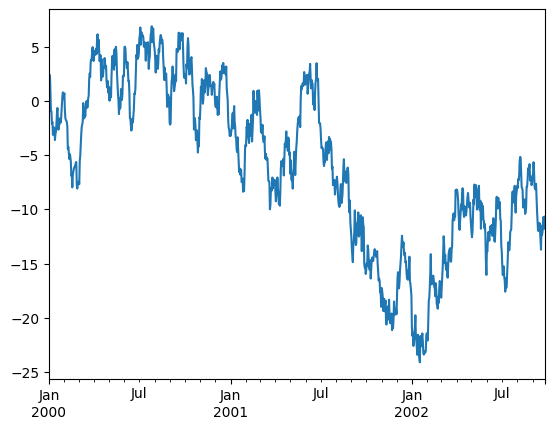

In [270]:
ts.plot()


In [271]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])


In [272]:
df = df.cumsum()


<Figure size 640x480 with 0 Axes>

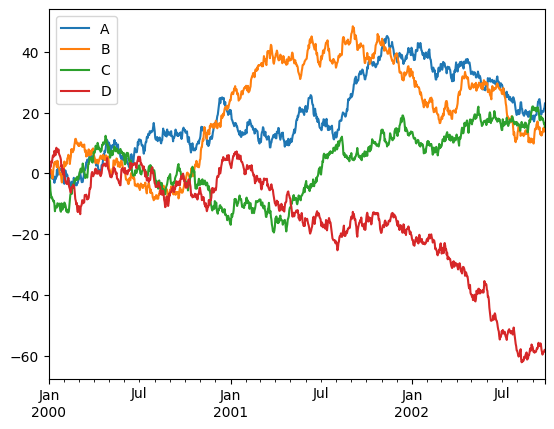

In [273]:
plt.figure()
df.plot()
plt.legend(loc='best')


## 导入导出数据

[返回目录](#目录)

In [274]:
df.to_csv('data/foo.csv')


In [275]:
pd.read_csv('data/foo.csv').head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,0.604454,1.238945,-0.611474,0.404373
1,2000-01-02,0.559832,1.186635,-1.950792,-0.346107
2,2000-01-03,0.298088,1.624779,-2.436920,2.085956
3,2000-01-04,-0.325273,0.653275,-5.704774,2.005130
4,2000-01-05,-1.418843,1.217457,-6.970972,2.392373


In [276]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')


In [277]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,0.604454,1.238945,-0.611474,0.404373
1,2000-01-02,0.559832,1.186635,-1.950792,-0.346107
2,2000-01-03,0.298088,1.624779,-2.436920,2.085956
3,2000-01-04,-0.325273,0.653275,-5.704774,2.005130
4,2000-01-05,-1.418843,1.217457,-6.970972,2.392373
